In [1]:
# Import packages
import pandas as pd
import os
import numpy as np

In [2]:
# Load data
df = pd.read_csv(os.path.join('../data', 'top_cb_ID_earrings_sales.csv'))
df

,shop_id,item_id,source,total_sales,level2_global_be_category,product_title
0,153149358,8442601157,Other CB,9046,Earrings,Anting Rumbai Panjang Hias Mutiara Berlian Imi...
1,70841363,1703110270,CNCB,5428,Earrings,1 Pair Ear Hooks Earhook Silicone Silicon Peng...
2,214449679,7622635875,Other CB,4596,Earrings,Ear Clip Without Ear Hole Immortal Spirit Sen ...
3,64102675,1392352937,CNCB,2053,Earrings,[Bayar Di Tempat]1 Pasang Anting Tusuk Berlian...
4,140729566,4195778888,Other CB,1846,Earrings,Anting Titanium Anti Karat Wanita 1 Pasang 14k...
...,...,...,...,...,...,...
995,40204942,16992872315,Other CB,0,Earrings,Better 12PCS/Set Kristal Berlian Imitasi Ear S...
996,757738921,17969987492,CNCB,0,Earrings,Anting Bentuk U Bahan S925 Silver Needle Aksen...
997,184864896,20272688601,Other CB,0,Earrings,♥ Aimelbie Perhiasan Korea ♥Anting vMoonlight ...
998,460954222,20488068283,Other CB,0,Earrings,Upstopid Anting Natal Wanita Hewan Menjuntai K...


In [3]:
# Descriptive analysis
df.describe()

,shop_id,item_id,total_sales
count,1.000000e+03,1.000000e+03,1000.000000
mean,3.216066e+08,1.496446e+10,50.165000
std,2.523883e+08,6.157130e+09,391.723506
min,8.497333e+06,7.566860e+08,0.000000
25%,1.395392e+08,9.963399e+09,0.000000
50%,2.610774e+08,1.617371e+10,1.000000
75%,4.145405e+08,2.026658e+10,5.000000
max,9.732506e+08,2.394187e+10,9046.000000


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()
product_titles = df['product_title']
tfidf_matrix = vectorizer.fit_transform(product_titles)
feature_names = vectorizer.get_feature_names_out()

title_index = 1
title_tfidf_values = tfidf_matrix.toarray()[title_index]
for feature_index, feature_value in enumerate(title_tfidf_values):
    feature_name = feature_names[feature_index]
    if feature_value > 0:
        print(f"{feature_name}: {feature_value}")

ear: 0.17550348285723968
earhook: 0.3628640139197639
hooks: 0.3280064964158274
kacamata: 0.3424736733117298
kaitan: 0.3424736733117298
pair: 0.31678488221328227
pengait: 0.3628640139197639
silicon: 0.3628640139197639
silicone: 0.3628640139197639


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(product_titles)
feature_names_bow = vectorizer.get_feature_names_out()

title_index = 1
title_bow_values = bow_matrix.toarray()[title_index]
for feature_index, feature_value in enumerate(title_bow_values):
    feature_name = feature_names_bow[feature_index]
    if feature_value > 0:
        print(f"{feature_name}: {feature_value}")

ear: 1
earhook: 1
hooks: 1
kacamata: 1
kaitan: 1
pair: 1
pengait: 1
silicon: 1
silicone: 1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_range = (2, 3)
vectorizer = CountVectorizer(ngram_range=ngram_range)
features = vectorizer.fit_transform(product_titles)
feature_names = vectorizer.get_feature_names_out()

for i, title in enumerate(product_titles):
    print("Title:", title)
    for feature_index in features[i].nonzero()[1]:
        feature_name = feature_names[feature_index]
        feature_count = features[i, feature_index]
        print("Feature:", feature_name, "Count:", feature_count)
    print()

Title: Anting Rumbai Panjang Hias Mutiara Berlian Imitasi Gaya Korea Untuk Wanita
Feature: anting rumbai Count: 1
Feature: rumbai panjang Count: 1
Feature: panjang hias Count: 1
Feature: hias mutiara Count: 1
Feature: mutiara berlian Count: 1
Feature: berlian imitasi Count: 1
Feature: imitasi gaya Count: 1
Feature: gaya korea Count: 1
Feature: korea untuk Count: 1
Feature: untuk wanita Count: 1
Feature: anting rumbai panjang Count: 1
Feature: rumbai panjang hias Count: 1
Feature: panjang hias mutiara Count: 1
Feature: hias mutiara berlian Count: 1
Feature: mutiara berlian imitasi Count: 1
Feature: berlian imitasi gaya Count: 1
Feature: imitasi gaya korea Count: 1
Feature: gaya korea untuk Count: 1
Feature: korea untuk wanita Count: 1

Title: 1 Pair Ear Hooks Earhook Silicone Silicon Pengait Kaitan Kacamata
Feature: pair ear Count: 1
Feature: ear hooks Count: 1
Feature: hooks earhook Count: 1
Feature: earhook silicone Count: 1
Feature: silicone silicon Count: 1
Feature: silicon pengait 

In [28]:
from collections import Counter

all_titles = ' '.join(product_titles)  # Concatenate all preprocessed titles
words = all_titles.split()  # Split into individual words
word_counts = Counter(words)  # Count occurrences of each word

most_common_words = word_counts.most_common(30)  # Get the 10 most common words

for word, count in most_common_words:
    print(f"Word: {word}, Count: {count}")

Word: Anting, Count: 903
Word: Untuk, Count: 490
Word: Wanita, Count: 482
Word: Gaya, Count: 251
Word: Bentuk, Count: 189
Word: Earrings, Count: 186
Word: Tusuk, Count: 181
Word: Desain, Count: 178
Word: Stud, Count: 169
Word: Perhiasan, Count: 161
Word: Bahan, Count: 160
Word: Korea, Count: 154
Word: Silver, Count: 117
Word: /, Count: 113
Word: Fashion, Count: 112
Word: Mutiara, Count: 104
Word: Berlian, Count: 101
Word: Warna, Count: 98
Word: Ear, Count: 95
Word: Telinga, Count: 91
Word: Bunga, Count: 82
Word: Imitasi, Count: 79
Word: Gantung, Count: 79
Word: Hias, Count: 72
Word: Tindik, Count: 70
Word: Kristal, Count: 68
Word: Emas, Count: 67
Word: Klip, Count: 65
Word: Hadiah, Count: 63
Word: Aksesoris, Count: 63


In [32]:
# Calculate characters length of title
titles_length = []

for title in product_titles:
    title_length = len(title)
    titles_length.append(title_length)

titles_length_df = pd.DataFrame(titles_length, columns=['title_length'])
df2 = pd.concat([df, titles_length_df], axis=1)


In [33]:
df2

,shop_id,item_id,source,total_sales,level2_global_be_category,product_title,title_length
0,153149358,8442601157,Other CB,9046,Earrings,Anting Rumbai Panjang Hias Mutiara Berlian Imi...,74
1,70841363,1703110270,CNCB,5428,Earrings,1 Pair Ear Hooks Earhook Silicone Silicon Peng...,65
2,214449679,7622635875,Other CB,4596,Earrings,Ear Clip Without Ear Hole Immortal Spirit Sen ...,147
3,64102675,1392352937,CNCB,2053,Earrings,[Bayar Di Tempat]1 Pasang Anting Tusuk Berlian...,94
4,140729566,4195778888,Other CB,1846,Earrings,Anting Titanium Anti Karat Wanita 1 Pasang 14k...,81
...,...,...,...,...,...,...,...
995,40204942,16992872315,Other CB,0,Earrings,Better 12PCS/Set Kristal Berlian Imitasi Ear S...,92
996,757738921,17969987492,CNCB,0,Earrings,Anting Bentuk U Bahan S925 Silver Needle Aksen...,83
997,184864896,20272688601,Other CB,0,Earrings,♥ Aimelbie Perhiasan Korea ♥Anting vMoonlight ...,60
998,460954222,20488068283,Other CB,0,Earrings,Upstopid Anting Natal Wanita Hewan Menjuntai K...,72


In [36]:
df3 = df2.drop(['shop_id', 'item_id', 'source', 'level2_global_be_category'], axis=1)
df3

,total_sales,product_title,title_length
0,9046,Anting Rumbai Panjang Hias Mutiara Berlian Imi...,74
1,5428,1 Pair Ear Hooks Earhook Silicone Silicon Peng...,65
2,4596,Ear Clip Without Ear Hole Immortal Spirit Sen ...,147
3,2053,[Bayar Di Tempat]1 Pasang Anting Tusuk Berlian...,94
4,1846,Anting Titanium Anti Karat Wanita 1 Pasang 14k...,81
...,...,...,...
995,0,Better 12PCS/Set Kristal Berlian Imitasi Ear S...,92
996,0,Anting Bentuk U Bahan S925 Silver Needle Aksen...,83
997,0,♥ Aimelbie Perhiasan Korea ♥Anting vMoonlight ...,60
998,0,Upstopid Anting Natal Wanita Hewan Menjuntai K...,72


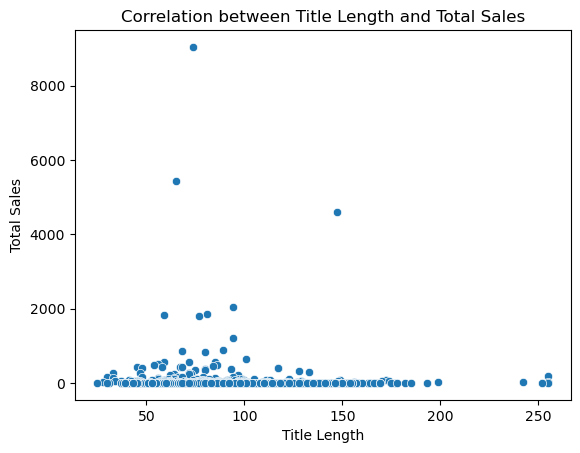

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = df3.drop(['product_title'], axis=1)

sns.scatterplot(data=plot_data, x='title_length', y='total_sales')
plt.xlabel('Title Length')
plt.ylabel('Total Sales')
plt.title('Correlation between Title Length and Total Sales')
plt.show()

In [40]:
correlation_coef = df3['title_length'].corr(df3['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

Pearson correlation coeff: -0.011214609755060449


Pearson correlation coeff: 0.11792233131124912


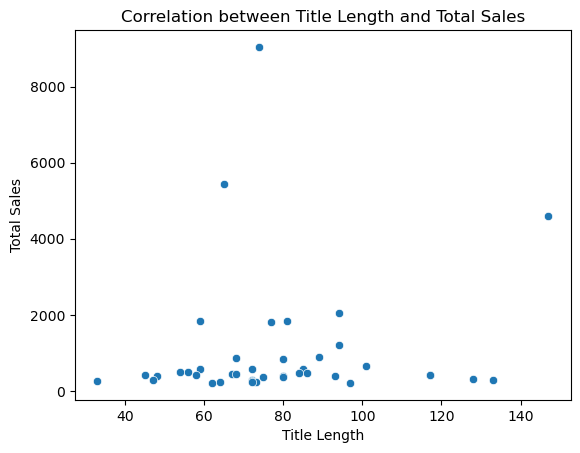

In [65]:
df4 = df3[df3['total_sales'] > 200]
correlation_coef = df4['title_length'].corr(df4['total_sales'])
print("Pearson correlation coeff:", correlation_coef)

plot_data = df4.drop(['product_title'], axis=1)

sns.scatterplot(data=plot_data, x='title_length', y='total_sales')
plt.xlabel('Title Length')
plt.ylabel('Total Sales')
plt.title('Correlation between Title Length and Total Sales')
plt.show()

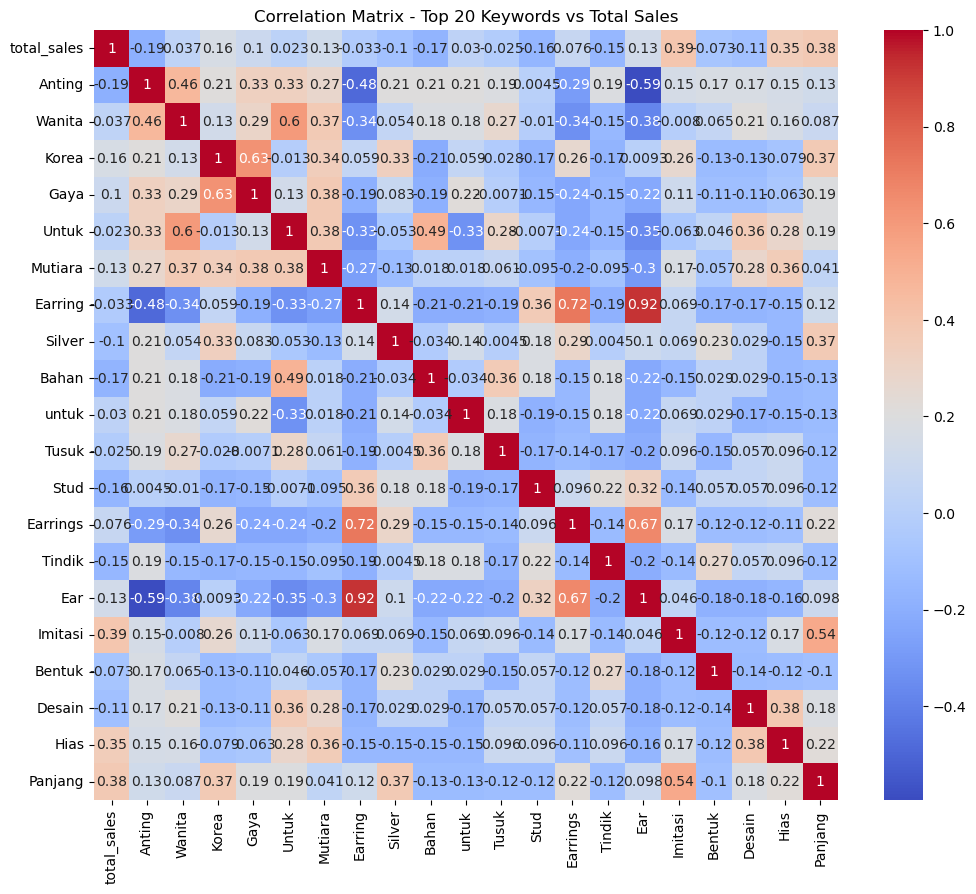

In [84]:
# Step 1: Extract keywords from product titles
keywords = df4['product_title'].str.split(expand=True).stack().value_counts()

# Step 2: Select top 20 most common keywords
top_20_keywords = keywords.head(20)

# Step 3: Create a new DataFrame with selected keywords and total sales
keyword_sales_df = df4[['total_sales']].copy()
for keyword in top_20_keywords.index:
    keyword_sales_df[keyword] = df4['product_title'].str.contains(keyword).astype(int)

# Step 4: Calculate correlation matrix
correlation_matrix = keyword_sales_df.corr()

# Step 5: Plot correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Top 20 Keywords vs Total Sales')
plt.show()

In [83]:
df4

,total_sales,product_title,title_length
0,9046,Anting Rumbai Panjang Hias Mutiara Berlian Imi...,74
1,5428,1 Pair Ear Hooks Earhook Silicone Silicon Peng...,65
2,4596,Ear Clip Without Ear Hole Immortal Spirit Sen ...,147
3,2053,[Bayar Di Tempat]1 Pasang Anting Tusuk Berlian...,94
4,1846,Anting Titanium Anti Karat Wanita 1 Pasang 14k...,81
5,1840,Anting Gantung Bentuk Bulan Sabit Warna Silver...,59
6,1799,6Pasang/Set Anting Hoop/Bulat Ukuran Kecil ke ...,77
7,1208,2022 Anting Tusuk Gantung Wanita Desain Tetesa...,94
8,892,XiaoboACC Anting Tusuk Sterling Silver 925 Mod...,89
9,866,100pcs 8mm Candy Color Metal Jump Rings Connec...,68


In [85]:
keywords.head(30)

Anting      36
Wanita      21
Korea       16
Gaya        14
Untuk       14
Mutiara     10
Earring      7
Silver       7
Bahan        7
untuk        7
Tusuk        6
Stud         6
Earrings     6
Tindik       6
Ear          6
Imitasi      5
Bentuk       5
Desain       5
Hias         4
Panjang      4
Anti         4
Berlian      4
Pasang       4
/            4
Rumbai       4
1            4
Emas         4
Model        4
Motif        3
Warna        3
dtype: int64